In [1]:
import networkx as nx
from networkx import MultiDiGraph
from search import *
import pyproj

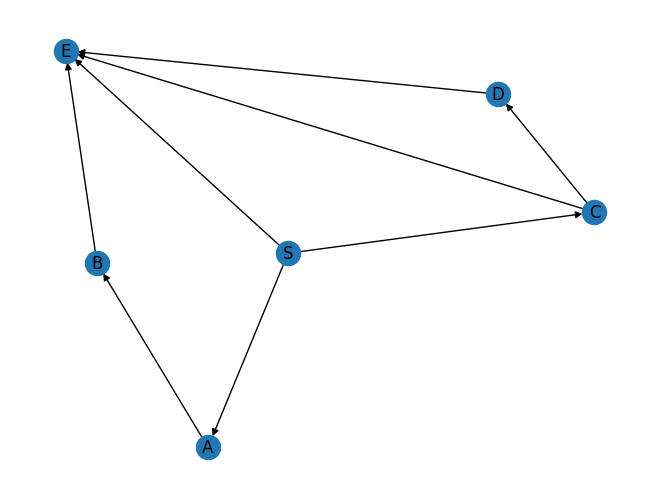

In [16]:
graph = nx.MultiDiGraph()
# graph.add_edge(, length=1, traveled=False)
graph.add_edge('S', 'A', length=2, traveled=True)
graph.add_edge('A', 'B', length=2, traveled=True)
graph.add_edge('S', 'E', length=1, traveled=True)
graph.add_edge('B', 'E', length=2, traveled=False)
graph.add_edge('S', 'C', length=2, traveled=False)
graph.add_edge('C', 'D', length=3, traveled=False)
graph.add_edge('D', 'E', length=1, traveled=False)
graph.add_edge('C', 'E', length=2.5, traveled=False)
nx.set_node_attributes(graph, {
    "S": {"x": 0, "y": 0},
    "A": {"x": 2, "y": 0},
    "B": {"x": 0, "y": -1},
    "C": {"x": 0, "y": 2},
    "D": {"x": -2, "y": 2},
    "E": {"x": -1, "y": 0}
})
nx.draw(graph, with_labels=True)

In [3]:
graph.nodes["S"]

{'x': 0, 'y': 0}

### Next up we load up the exploration graph functionality.



In [4]:
from MaxHeap import MaxHeap
from ExplorationGraph import *
from MaxScoreFrontier import MaxScoreFrontier
from ExplorationSearch import optimal_path_search, optimal_path_search_internal

In [5]:
settings = ExplorationGraphSettings(
    target_length=5,
    overlength_penalty=1,
    outregion_penalty=0.5,
    start="S",
    goal="E",
)

In [6]:
import math

# Overwrite the distance function for testing (Euclidean distance instead of Haversine)
ex_graph = ExplorationGraph(graph, settings, crs="WGS84")
ex_graph.distance = lambda node1, node2: math.sqrt((node1["x"]-node2["x"]) ** 2 + (node1["y"]-node2["y"]) ** 2)

In [7]:
arc = ExplorationArc(None, "S", 0, None)
continuing = ex_graph.continuing_paths(ExplorationPath([arc], 0, 0, 0))
test_path = continuing[2]

In [8]:
print(test_path.arcs)
print(test_path.score)
print(ex_graph.best_case_score(test_path))

[ExplorationArc(tail=None, head='S', key=0, attributes=None), ExplorationArc(tail='S', head='C', key=0, attributes={'length': 2, 'traveled': False})]
2
5


In [9]:
frontier = MaxScoreFrontier(ex_graph)
search = optimal_path_search_internal(ex_graph, frontier)
optimal_path = next(search)

In [10]:
print(optimal_path.score)
optimal_path.arcs

4.5


[ExplorationArc(tail=None, head='S', key=0, attributes=None),
 ExplorationArc(tail='S', head='C', key=0, attributes={'length': 2, 'traveled': False}),
 ExplorationArc(tail='C', head='E', key=0, attributes={'length': 2.5, 'traveled': False})]

In [11]:
next_path = next(search)
print(next_path.score)
next_path.arcs

4


[ExplorationArc(tail=None, head='S', key=0, attributes=None),
 ExplorationArc(tail='S', head='C', key=0, attributes={'length': 2, 'traveled': False}),
 ExplorationArc(tail='C', head='D', key=0, attributes={'length': 3, 'traveled': False}),
 ExplorationArc(tail='D', head='E', key=0, attributes={'length': 1, 'traveled': False})]

In [12]:
p = search.gi_frame.f_locals["found_paths"]
print(p.container[0][2].arcs)

[ExplorationArc(tail=None, head='S', key=0, attributes=None), ExplorationArc(tail='S', head='E', key=0, attributes={'length': 1, 'traveled': True})]


In [13]:
print(frontier.heap)
frontier.heap.container[0][2].arcs

[(-0.5857864376269049, 6, <ExplorationGraph.ExplorationPath object at 0x00000188693A5C10>)]


[ExplorationArc(tail=None, head='S', key=0, attributes=None),
 ExplorationArc(tail='S', head='A', key=0, attributes={'length': 2, 'traveled': True}),
 ExplorationArc(tail='A', head='B', key=0, attributes={'length': 2, 'traveled': True})]

In [14]:
# Print out remaining paths
for path in search:
    print(path.score)
    print(path.arcs)

0
[ExplorationArc(tail=None, head='S', key=0, attributes=None), ExplorationArc(tail='S', head='E', key=0, attributes={'length': 1, 'traveled': True})]


StopIteration: 